## Task 2: Decision Trees for Human Activity Recognition

### Use Sklearn Library to Train Decision Trees. [1.5 marks]

1. Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall, and confusion matrix of the model.
2. Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall, and confusion matrix of the model.
3. Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall, and confusion matrix of the model.


## Decision Tree using raw accelerometer data

- We have 30 subjects, each performing 6 activities. The accelerometer time series data is obtained by calling the utility file "MakeDataset.py".
- For each individual subject and activity, the time series data consists of 500 timesteps with 3 features (accelerometer data in x, y, z directions).
- To flatten the data, the time series is reshaped into 1500 features (500 timesteps * 3 features) for each subject and activity, with one activity label. 
- A Decision Tree Classifier is trained on this flattened data, and the decision tree is visualized.
- The decision tree is quite large and complex, but it shows how the classifier is able to distinguish between the different activities nevertheless.


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from MakeDataset import X_train, X_test, y_train, y_test
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Class mapping for visualization
classes = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LAYING"}


# Print shape of X_train, X_test, y_train_mapped, y_test_mapped
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Reshape the data to flatten the time-series dimension
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape: (126, 1500)
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Shape: (54, 1500)

# Print the shape of the flattened data
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

X_train shape: (126, 500, 3)
X_test shape: (54, 500, 3)
y_train shape: (126,)
y_test shape: (54,)
X_train_flat shape: (126, 1500)
X_test_flat shape: (54, 1500)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Class mapping
classes = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LAYING"}

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_flat, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test_flat)

# Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# Print classification report for detailed metrics, including class labels
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=[classes[i] for i in sorted(classes.keys())]))

# Print precision, recall, and accuracy for each class
precision = precision_score(y_test, y_pred, average=None)  # Separate precision for each class
recall = recall_score(y_test, y_pred, average=None)  # Separate recall for each class

print("Precision, Recall, and Accuracy for each class:")
for i, class_label in enumerate(sorted(classes.keys())):
    class_accuracy = accuracy_score(y_test == class_label, y_pred == class_label)
    print(f"Class {classes[class_label]}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, Accuracy = {class_accuracy:.4f}")

# Print overall precision and recall
precision_macro = precision_score(y_test, y_pred, average='macro')  # Macro-averaged precision
recall_macro = recall_score(y_test, y_pred, average='macro')  # Macro-averaged recall

print(f"\nOverall Precision (Macro-averaged): {precision_macro}")
print(f"Overall Recall (Macro-averaged): {recall_macro}")
print(f"Overall Accuracy: {accuracy}")


Accuracy: 0.6111111111111112

Classification Report:
                     precision    recall  f1-score   support

           WALKING       0.25      0.22      0.24         9
  WALKING_UPSTAIRS       0.50      0.56      0.53         9
WALKING_DOWNSTAIRS       0.25      0.11      0.15         9
           SITTING       0.67      0.89      0.76         9
          STANDING       0.80      0.89      0.84         9
            LAYING       0.90      1.00      0.95         9

          accuracy                           0.61        54
         macro avg       0.56      0.61      0.58        54
      weighted avg       0.56      0.61      0.58        54

Precision, Recall, and Accuracy for each class:
Class WALKING: Precision = 0.2500, Recall = 0.2222, Accuracy = 0.7593
Class WALKING_UPSTAIRS: Precision = 0.5000, Recall = 0.5556, Accuracy = 0.8333
Class WALKING_DOWNSTAIRS: Precision = 0.2500, Recall = 0.1111, Accuracy = 0.7963
Class SITTING: Precision = 0.6667, Recall = 0.8889, Accuracy = 0.

## Visualizing the Decsion Tree

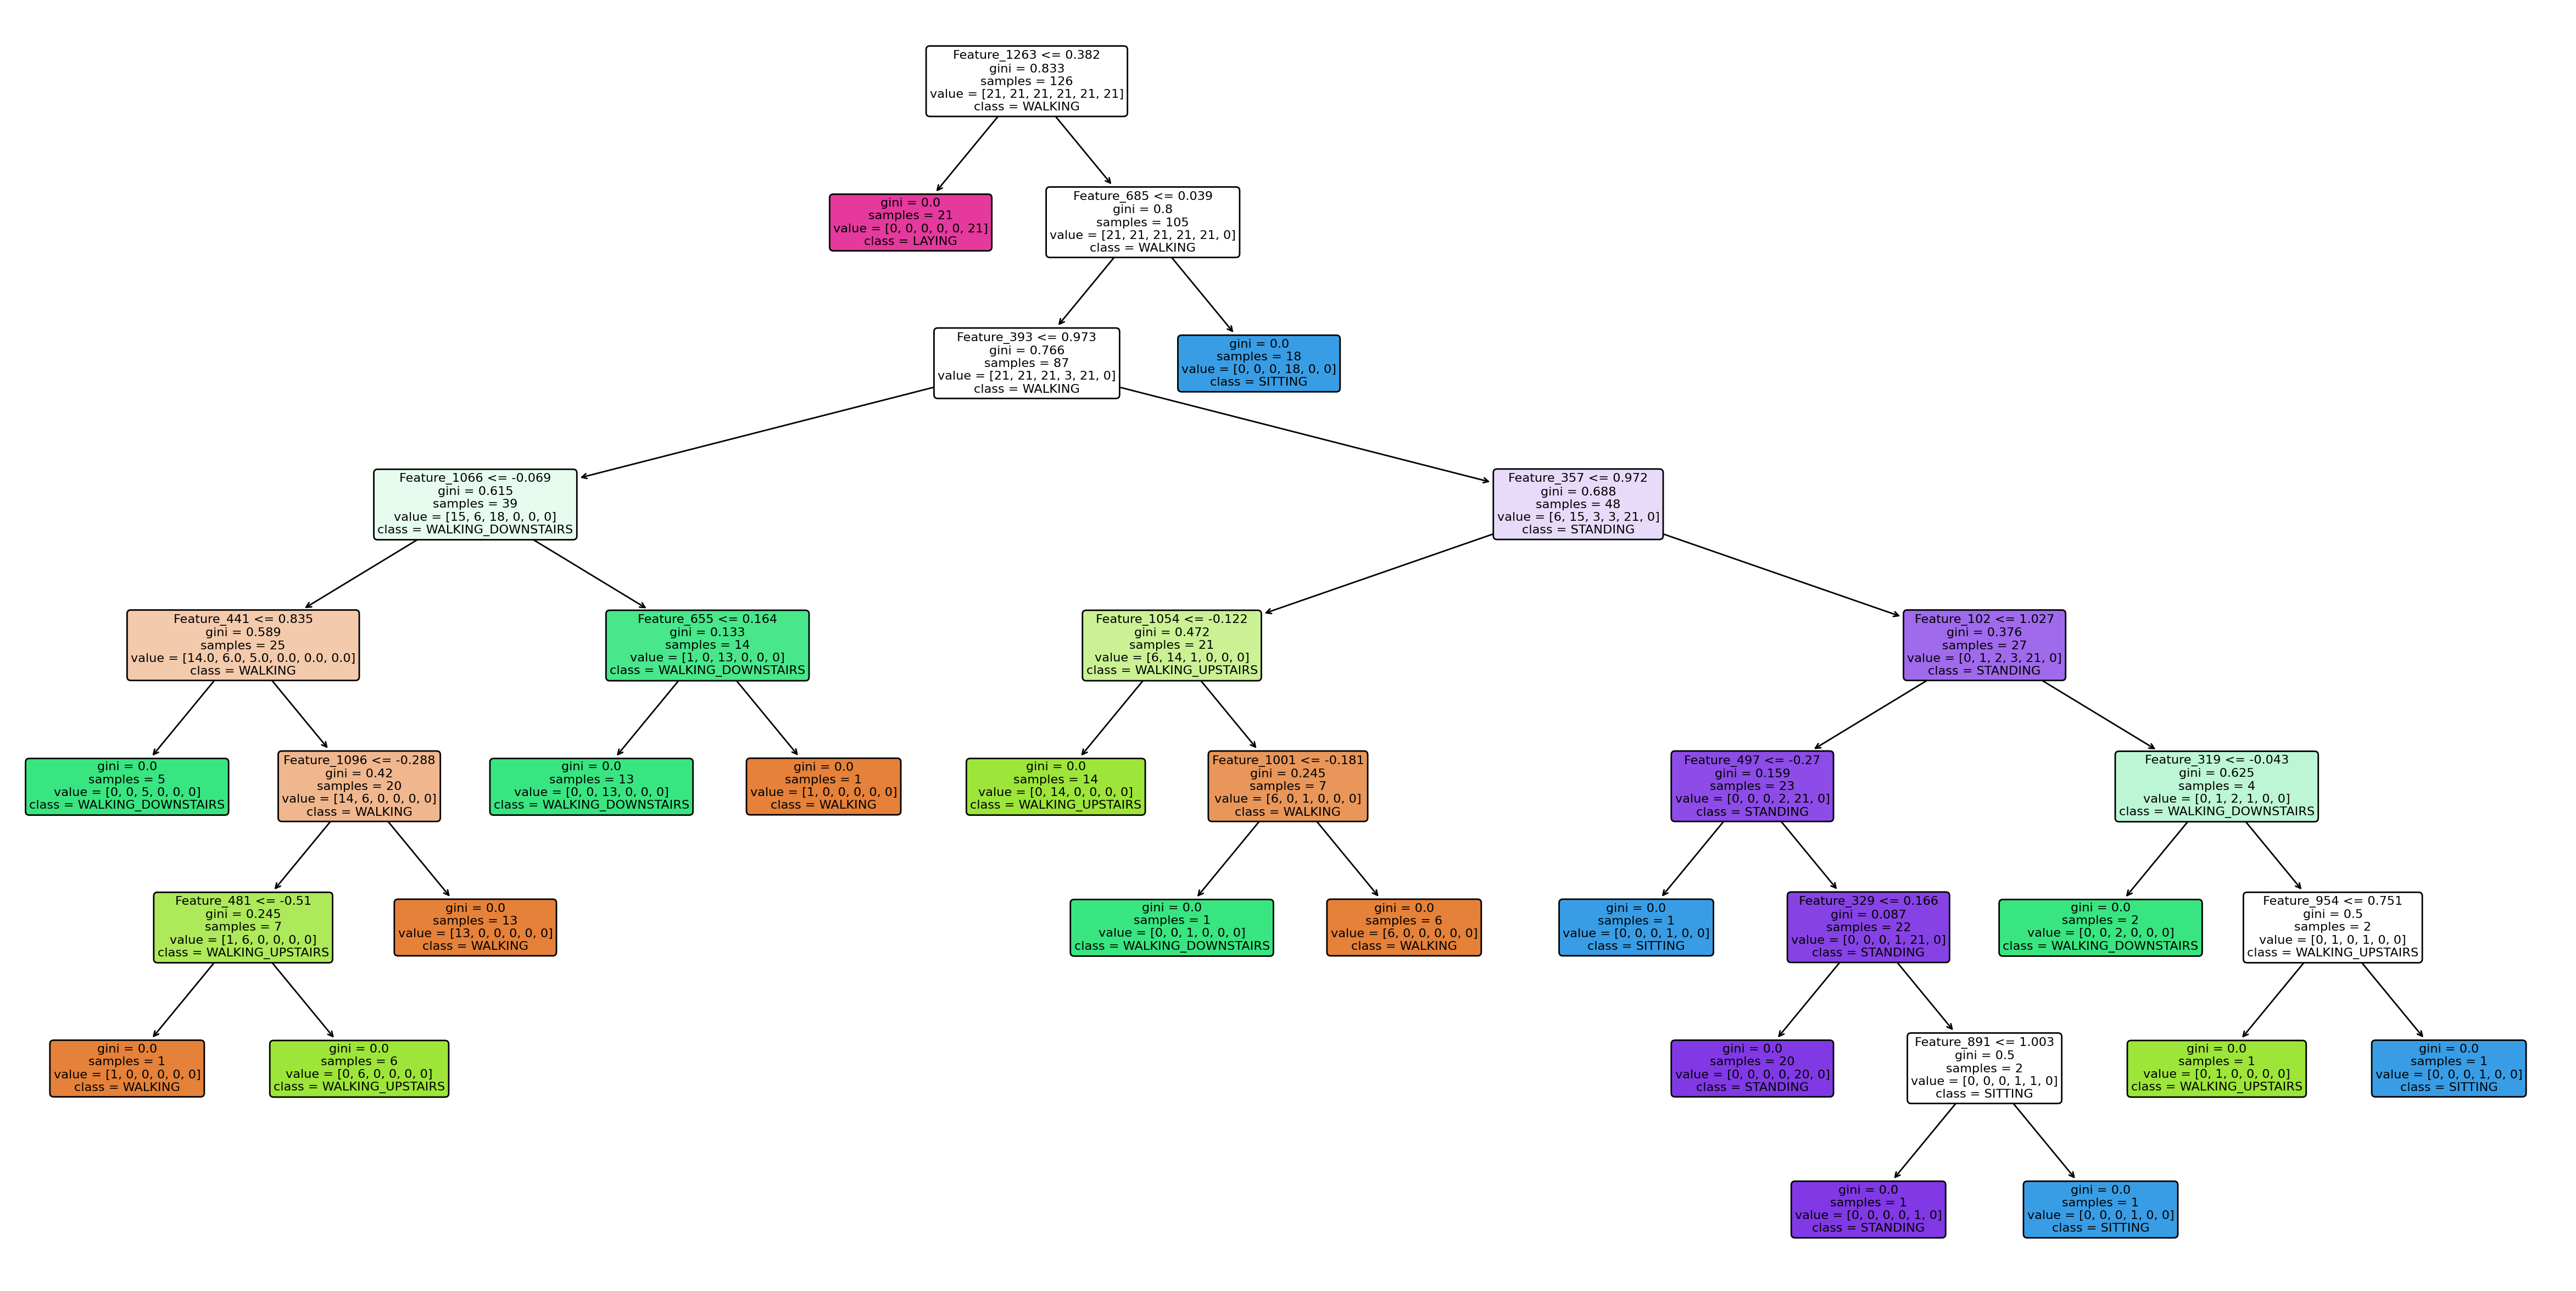

In [13]:
# Visualize the Decision Tree
plt.figure(figsize=(30, 15))  # Set figure size for better readability
plot_tree(clf, filled=True, rounded=True, feature_names=[f'Feature_{i}' for i in range(X_train_flat.shape[1])], class_names=[classes[i] for i in sorted(classes.keys())])
plt.show()


## Confusion Matrix

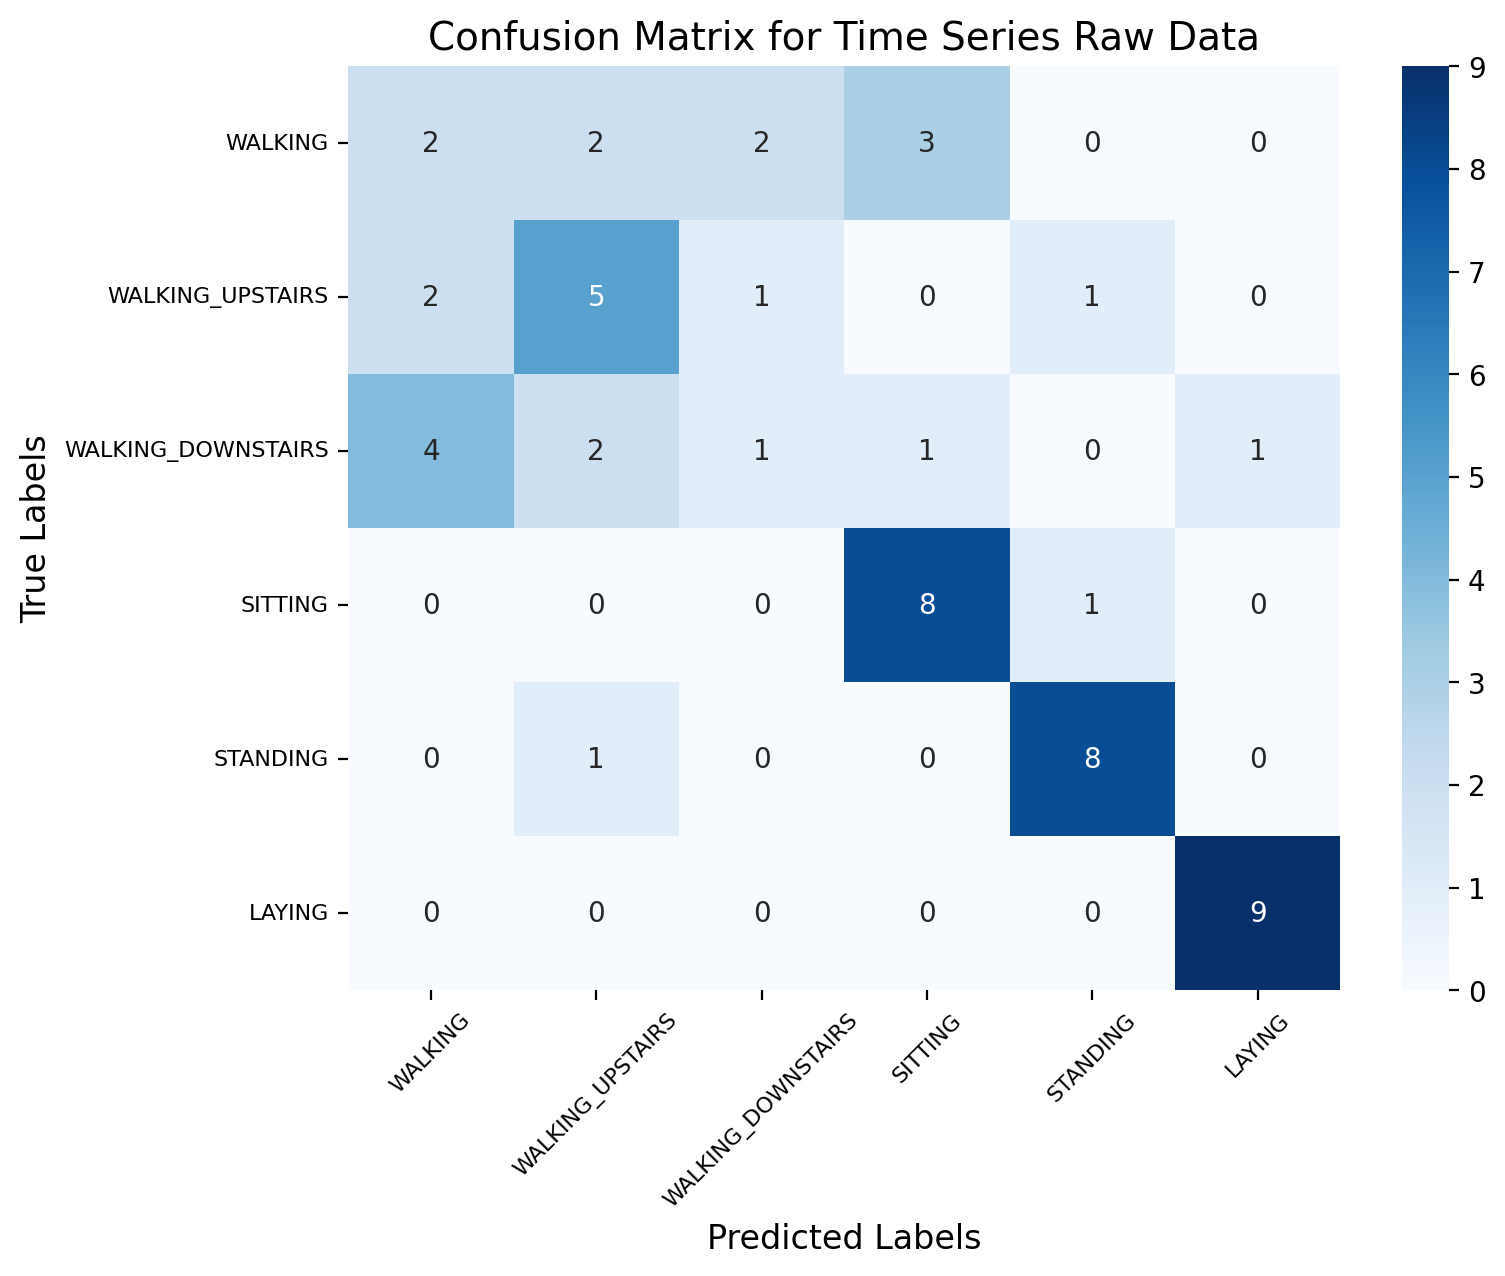

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix with class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[classes[i] for i in sorted(classes.keys())], 
            yticklabels=[classes[i] for i in sorted(classes.keys())])

# Customize font sizes and rotate yticks
plt.xticks(fontsize=8, rotation=45)  # Smaller font size for xticks
plt.yticks(fontsize=8)  # Smaller font size for yticks and rotate by 45 degrees
plt.xlabel('Predicted Labels', fontsize=12)  # Larger font size for xlabel
plt.ylabel('True Labels', fontsize=12)  # Larger font size for ylabel
plt.title('Confusion Matrix for Time Series Raw Data', fontsize=14)  # Larger font size for title

plt.show()


# Passing TSFEL data as features (Not complete)

In [33]:
import os
import pandas as pd
import numpy as np


def load_dataset(base_dir, dataset_type, activities):
    """
    Load dataset from the specified directory.

    Parameters:
    - base_dir (str): Base directory containing the datasets.
    - dataset_type (str): Either 'Train' or 'Test'.
    - activities (list): List of activity labels.

    Returns:
    - data (np.array): Numpy array with shape (num_subjects, num_timesteps, num_features).
    - labels (np.array): Corresponding labels for the data.
    """
    data = []
    labels = []
    
    for activity in activities:
        folder_path = os.path.join(base_dir, dataset_type, activity)
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):  # Ensure we're only loading CSV files
                file_path = os.path.join(folder_path, file_name)
                df = pd.read_csv(file_path)
                
                # Assuming the columns represent the 3 accelerometer axes
                num_timesteps, num_features = df.shape
                
                # Convert the DataFrame to a numpy array with the shape (num_timesteps, num_features)
                subject_data = df.values.reshape((num_timesteps, num_features))  # Shape: (500, 3)
                
                data.append(subject_data)
                labels.append(activity)
    
    # Convert lists to numpy arrays
    data = np.array(data)  # Shape: (num_subjects, num_timesteps, num_features)
    labels = np.array(labels)  # Corresponding labels
    
    return data, labels

# Define the base directory path
base_dir = 'Datasets/TSFEL_3axes_allfeatures'  # Update this with the actual path if different

# List of activity labels
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

from sklearn.preprocessing import LabelEncoder

# Load Train and Test datasets
X_train, y_train = load_dataset(base_dir, 'Train', activities)
X_test, y_test = load_dataset(base_dir, 'Test', activities)
# Convert string labels to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Print unique labels to verify they are numbers
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))


X_train shape: (126, 1, 1173)
y_train shape: (126,)
X_test shape: (54, 1, 1173)
y_test shape: (54,)
Unique labels in y_train: [0 1 2 3 4 5]
Unique labels in y_test: [0 1 2 3 4 5]


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Class mapping
classes = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LAYING"}

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_flat, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test_flat)

# Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# Print classification report for detailed metrics, including class labels
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=[classes[i] for i in sorted(classes.keys())]))

# Print precision, recall, and accuracy for each class
precision = precision_score(y_test, y_pred, average=None)  # Separate precision for each class
recall = recall_score(y_test, y_pred, average=None)  # Separate recall for each class

print("Precision, Recall, and Accuracy for each class:")
for i, class_label in enumerate(sorted(classes.keys())):
    class_accuracy = accuracy_score(y_test == class_label, y_pred == class_label)
    print(f"Class {classes[class_label]}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, Accuracy = {class_accuracy:.4f}")

# Print overall precision and recall
precision_macro = precision_score(y_test, y_pred, average='macro')  # Macro-averaged precision
recall_macro = recall_score(y_test, y_pred, average='macro')  # Macro-averaged recall

print(f"\nOverall Precision (Macro-averaged): {precision_macro}")
print(f"Overall Recall (Macro-averaged): {recall_macro}")
print(f"Overall Accuracy: {accuracy}")


Accuracy: 0.2222222222222222

Classification Report:
                     precision    recall  f1-score   support

           WALKING       0.50      0.33      0.40         9
  WALKING_UPSTAIRS       0.18      0.33      0.23         9
WALKING_DOWNSTAIRS       0.23      0.33      0.27         9
           SITTING       0.00      0.00      0.00         9
          STANDING       0.50      0.11      0.18         9
            LAYING       0.22      0.22      0.22         9

          accuracy                           0.22        54
         macro avg       0.27      0.22      0.22        54
      weighted avg       0.27      0.22      0.22        54

Precision, Recall, and Accuracy for each class:
Class WALKING: Precision = 0.5000, Recall = 0.3333, Accuracy = 0.6296
Class WALKING_UPSTAIRS: Precision = 0.1765, Recall = 0.3333, Accuracy = 0.7037
Class WALKING_DOWNSTAIRS: Precision = 0.2308, Recall = 0.3333, Accuracy = 0.7037
Class SITTING: Precision = 0.0000, Recall = 0.0000, Accuracy = 0.

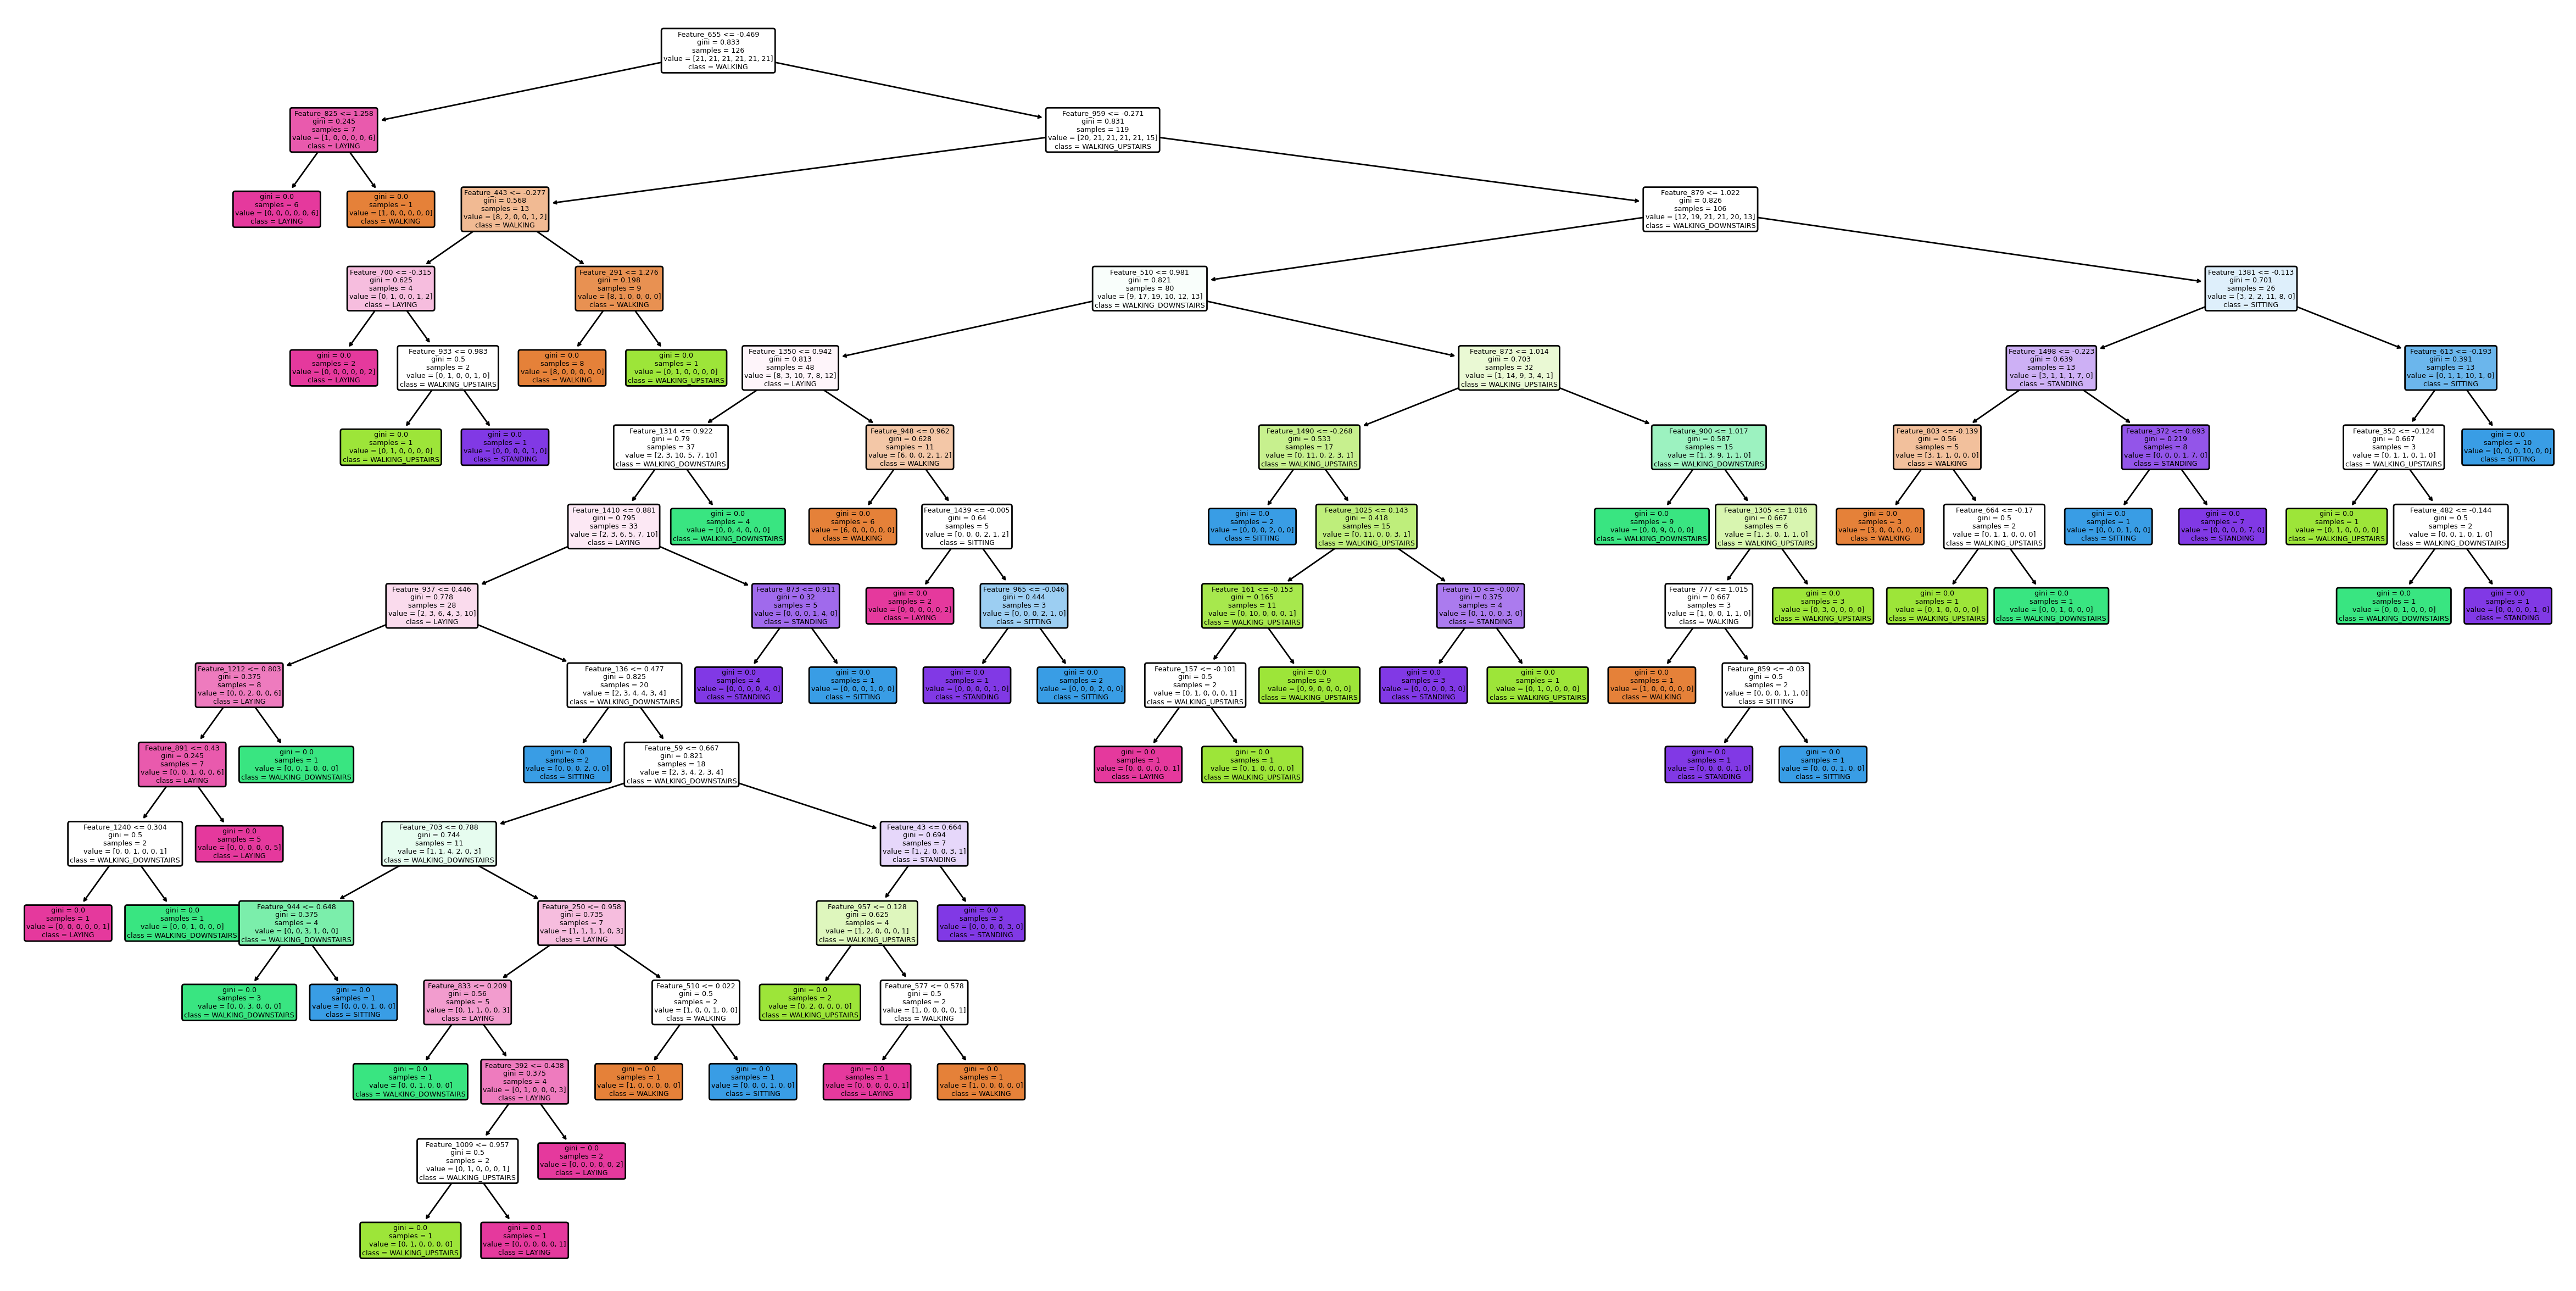

In [35]:
# Visualize the Decision Tree
plt.figure(figsize=(30, 15))  # Set figure size for better readability
plot_tree(clf, filled=True, rounded=True, feature_names=[f'Feature_{i}' for i in range(X_train_flat.shape[1])], class_names=[classes[i] for i in sorted(classes.keys())])
plt.show()


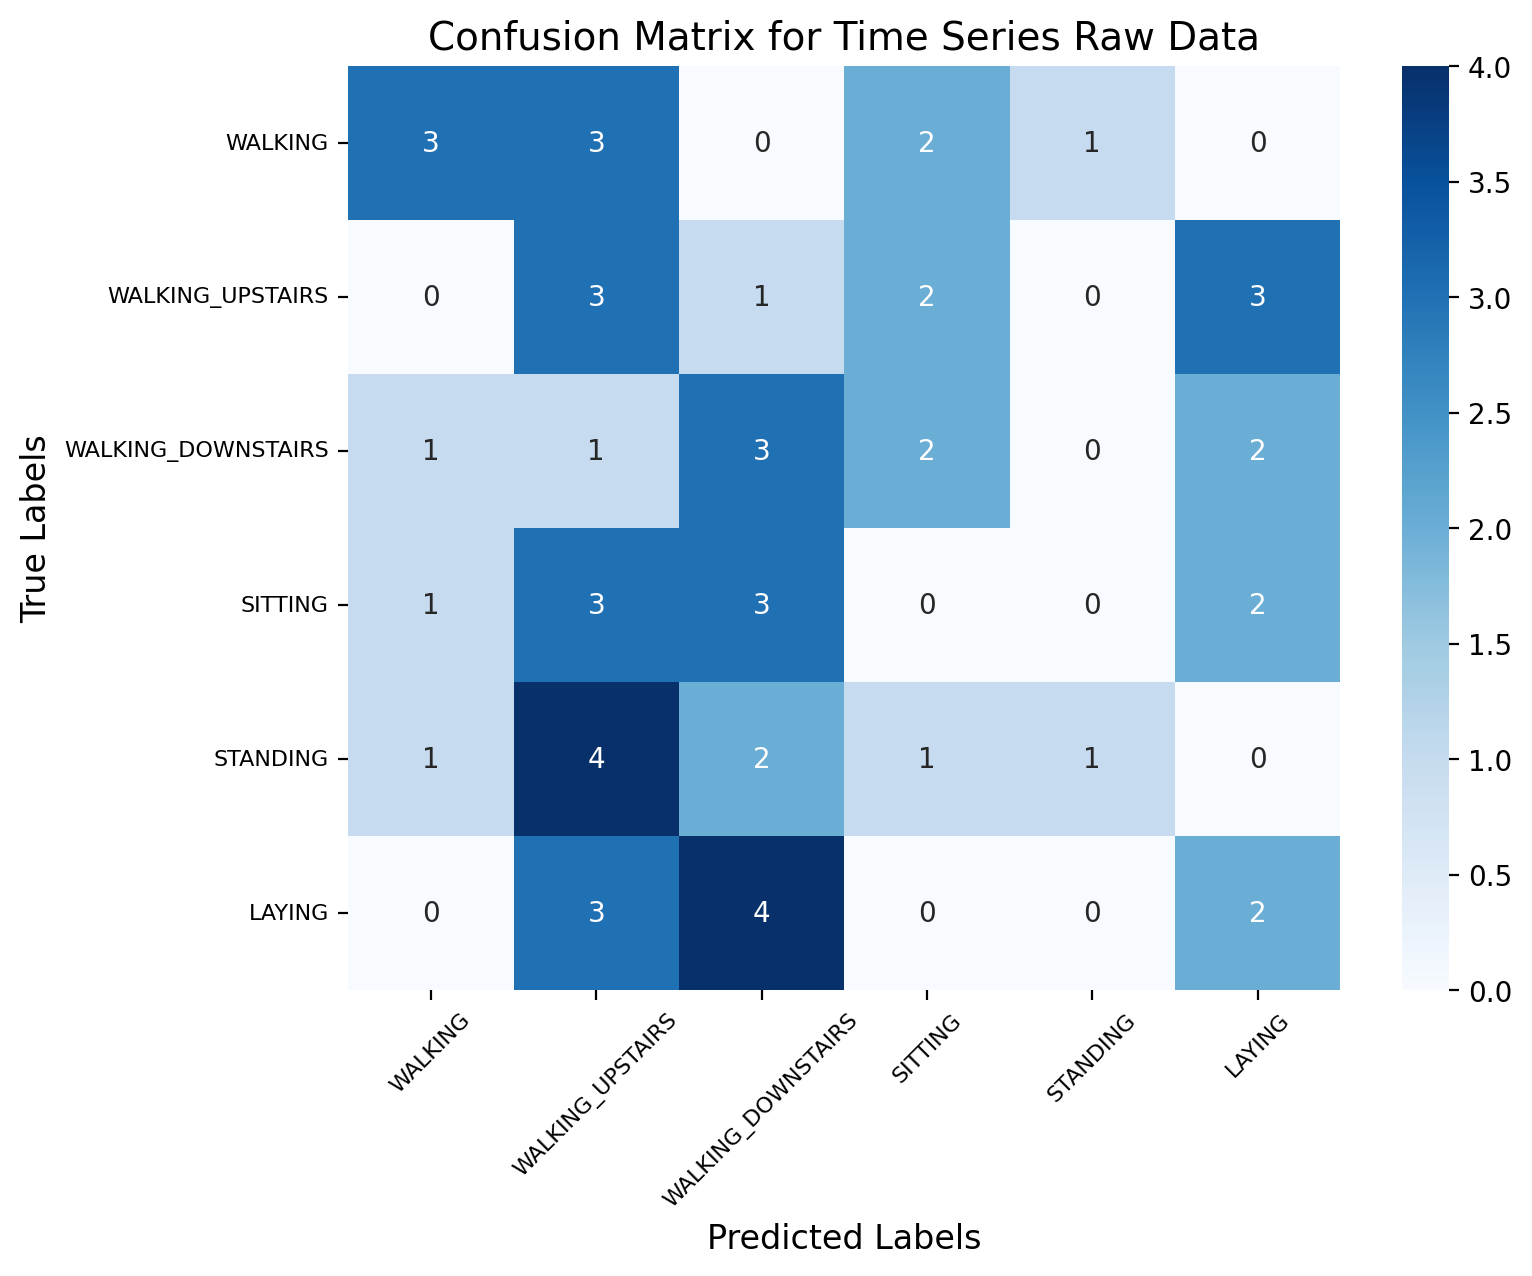

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix with class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[classes[i] for i in sorted(classes.keys())], 
            yticklabels=[classes[i] for i in sorted(classes.keys())])

# Customize font sizes and rotate yticks
plt.xticks(fontsize=8, rotation=45)  # Smaller font size for xticks
plt.yticks(fontsize=8)  # Smaller font size for yticks and rotate by 45 degrees
plt.xlabel('Predicted Labels', fontsize=12)  # Larger font size for xlabel
plt.ylabel('True Labels', fontsize=12)  # Larger font size for ylabel
plt.title('Confusion Matrix for Time Series Raw Data', fontsize=14)  # Larger font size for title

plt.show()
